# **Cryptocurrency Volatility Prediction**

In [1]:
from google.colab import files
uploaded = files.upload()


Saving dataset.csv.zip to dataset.csv.zip


In [2]:
uploaded.keys()


dict_keys(['dataset.csv.zip'])

In [4]:
import pandas as pd

df = pd.read_csv("dataset.csv.zip")
df.head()


,Unnamed: 0,open,high,low,close,volume,marketCap,timestamp,crypto_name,date
0,0,112.900002,118.800003,107.142998,115.910004,0.0,1.288693e+09,2013-05-05T23:59:59.999Z,Bitcoin,2013-05-05
1,1,3.493130,3.692460,3.346060,3.590890,0.0,6.229819e+07,2013-05-05T23:59:59.999Z,Litecoin,2013-05-05
2,2,115.980003,124.663002,106.639999,112.300003,0.0,1.249023e+09,2013-05-06T23:59:59.999Z,Bitcoin,2013-05-06
3,3,3.594220,3.781020,3.116020,3.371250,0.0,5.859436e+07,2013-05-06T23:59:59.999Z,Litecoin,2013-05-06
4,4,112.250000,113.444000,97.699997,111.500000,0.0,1.240594e+09,2013-05-07T23:59:59.999Z,Bitcoin,2013-05-07


In [14]:
df.columns


Index(['Unnamed: 0', 'open', 'high', 'low', 'close', 'volume', 'marketCap',
       'timestamp', 'crypto_name', 'date', 'return', 'volatility_7d',
       'volatility_30d', 'ma_7', 'ma_30'],
      dtype='object')

In [15]:
df = df.drop(columns=['return', 'volatility_7d', 'volatility_30d', 'ma_7', 'ma_30'], errors='ignore')
df.head()


,Unnamed: 0,open,high,low,close,volume,marketCap,timestamp,crypto_name,date
0,0,112.900002,118.800003,107.142998,115.910004,0.0,1.288693e+09,2013-05-05T23:59:59.999Z,Bitcoin,2013-05-05
1,1,3.493130,3.692460,3.346060,3.590890,0.0,6.229819e+07,2013-05-05T23:59:59.999Z,Litecoin,2013-05-05
2,2,115.980003,124.663002,106.639999,112.300003,0.0,1.249023e+09,2013-05-06T23:59:59.999Z,Bitcoin,2013-05-06
3,3,3.594220,3.781020,3.116020,3.371250,0.0,5.859436e+07,2013-05-06T23:59:59.999Z,Litecoin,2013-05-06
4,4,112.250000,113.444000,97.699997,111.500000,0.0,1.240594e+09,2013-05-07T23:59:59.999Z,Bitcoin,2013-05-07


In [16]:
df.isnull().sum()


,0
Unnamed: 0,0
open,0
high,0
low,0
close,0
volume,0
marketCap,0
timestamp,0
crypto_name,0
date,0


In [17]:
df.describe()


,Unnamed: 0,open,high,low,close,volume,marketCap
count,72946.000000,72946.000000,7.294600e+04,72946.000000,7.294600e+04,7.294600e+04,7.294600e+04
mean,36472.500000,870.194495,8.964124e+02,844.060640,8.712949e+02,2.207607e+09,1.474922e+10
std,21057.840705,5231.654470,5.398613e+03,5079.389387,5.235508e+03,9.617885e+09,7.501159e+10
min,0.000000,0.000000,1.022100e-10,0.000000,8.292000e-11,0.000000e+00,0.000000e+00
25%,18236.250000,0.167916,1.767999e-01,0.158630,1.682982e-01,8.320618e+06,1.860432e+08
50%,36472.500000,1.630666,1.717542e+00,1.541486,1.640219e+00,1.098756e+08,1.268539e+09
75%,54708.750000,26.070557,2.756868e+01,24.791776,2.625195e+01,6.691398e+08,5.118618e+09
max,72945.000000,67549.735581,1.621883e+05,66458.723733,6.756683e+04,3.509679e+11,1.274831e+12


In [19]:
df['crypto_name'].unique()


array(['Bitcoin', 'Litecoin', 'XRP', 'Dogecoin', 'Monero', 'Stellar',
       'Tether', 'Ethereum', 'Ethereum Classic', 'Maker',
       'Basic Attention Token', 'EOS', 'Bitcoin Cash', 'BNB', 'TRON',
       'Decentraland', 'Chainlink', 'Cardano', 'Filecoin',
       'Theta Network', 'Huobi Token', 'Ravencoin', 'Tezos', 'VeChain',
       'Quant', 'USD Coin', 'Cronos', 'Wrapped Bitcoin', 'Cosmos',
       'Polygon', 'OKB', 'UNUS SED LEO', 'Algorand', 'Chiliz',
       'THORChain', 'Terra Classic', 'FTX Token', 'Hedera', 'Binance USD',
       'Dai', 'Solana', 'Avalanche', 'Shiba Inu', 'The Sandbox',
       'Polkadot', 'Elrond', 'Uniswap', 'Aave', 'NEAR Protocol', 'Flow',
       'Internet Computer', 'Casper', 'Toncoin', 'Chain', 'ApeCoin',
       'Aptos'], dtype=object)

In [20]:
df['date'].min(), df['date'].max()


('2013-05-05', '2022-10-23')

In [22]:
# 1. Daily return (already present but recomputing to be safe)
df['return'] = df['close'].pct_change()

# 2. Volatility (standard deviation of returns)
df['volatility_7d'] = df['return'].rolling(window=7).std()
df['volatility_30d'] = df['return'].rolling(window=30).std()

# 3. Moving averages
df['ma_7'] = df['close'].rolling(window=7).mean()
df['ma_30'] = df['close'].rolling(window=30).mean()

# Drop rows with NaN created by rolling windows
df = df.dropna()

df.head()


,Unnamed: 0,open,high,low,close,volume,marketCap,timestamp,crypto_name,date,return,volatility_7d,volatility_30d,ma_7,ma_30
30,30,122.500000,123.621002,120.120003,122.000000,0.0,1.363710e+09,2013-05-20T23:59:59.999Z,Bitcoin,2013-05-20,0.000082,20.557903,17.924783,71.469644,59.978908
31,31,3.314850,3.323340,3.150050,3.181760,0.0,5.668275e+07,2013-05-20T23:59:59.999Z,Litecoin,2013-05-20,-0.973920,17.953876,17.924920,54.350610,59.965270
32,32,3.193260,3.215970,3.040910,3.086750,0.0,5.507303e+07,2013-05-21T23:59:59.999Z,Litecoin,2013-05-21,-0.029861,17.861592,17.808427,54.336418,56.324829
33,33,122.019997,123.000000,121.209999,122.879997,0.0,1.374013e+09,2013-05-21T23:59:59.999Z,Bitcoin,2013-05-21,38.808859,20.103506,18.237031,71.419999,60.308454
34,34,3.091910,3.135290,3.031190,3.120760,0.0,5.576690e+07,2013-05-22T23:59:59.999Z,Litecoin,2013-05-22,-0.974603,18.545502,18.102217,54.223251,56.695812


In [23]:
feature_cols = ['open', 'high', 'low', 'close', 'volume', 'marketCap',
                'volatility_7d', 'volatility_30d', 'ma_7', 'ma_30']

X = df[feature_cols]
y = df['return']

X.head(), y.head()


(          open        high         low       close  volume     marketCap  \
 30  122.500000  123.621002  120.120003  122.000000     0.0  1.363710e+09   
 31    3.314850    3.323340    3.150050    3.181760     0.0  5.668275e+07   
 32    3.193260    3.215970    3.040910    3.086750     0.0  5.507303e+07   
 33  122.019997  123.000000  121.209999  122.879997     0.0  1.374013e+09   
 34    3.091910    3.135290    3.031190    3.120760     0.0  5.576690e+07   
 
     volatility_7d  volatility_30d       ma_7      ma_30  
 30      20.557903       17.924783  71.469644  59.978908  
 31      17.953876       17.924920  54.350610  59.965270  
 32      17.861592       17.808427  54.336418  56.324829  
 33      20.103506       18.237031  71.419999  60.308454  
 34      18.545502       18.102217  54.223251  56.695812  ,
 30     0.000082
 31    -0.973920
 32    -0.029861
 33    38.808859
 34    -0.974603
 Name: return, dtype: float64)

In [24]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, shuffle=False  # No shuffle because time-series
)

print(X_train.shape, X_test.shape)


(58332, 10) (14584, 10)


In [25]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

In [26]:
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Predict on test set
y_pred = model.predict(X_test)

# Evaluation metrics
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("RMSE:", rmse)
print("R² Score:", r2)


RMSE: 278708836475.16364
R² Score: -8337081.282505727


In [27]:
results = X_test.copy()
results['actual_return'] = y_test.values
results['predicted_return'] = y_pred

results.head()


,open,high,low,close,volume,marketCap,volatility_7d,volatility_30d,ma_7,ma_30,actual_return,predicted_return
58362,14.530746,14.746978,13.422879,13.775897,8.009144e+08,6.061526e+09,0.0,953946.827789,14.870416,1015.906050,-0.517611,-2.399311e+09
58363,24.908853,26.386092,23.659097,25.818055,1.593540e+08,2.435855e+09,0.0,953946.827787,12.931011,1016.481215,0.874147,3.511898e+09
58364,66.272970,74.097478,56.368907,68.155279,2.317981e+07,8.228208e+08,0.0,953946.827791,22.644828,1017.189991,1.639830,1.051352e+10
58365,1819.081999,1836.998025,1722.050781,1787.510714,1.736860e+10,2.087351e+11,0.0,953946.827757,276.262853,1076.753276,25.227032,-2.333800e+11
58366,0.228644,0.231174,0.199229,0.207005,1.994500e+08,1.220079e+09,0.0,953946.827759,276.284163,1076.742749,-0.999884,-1.548783e+09


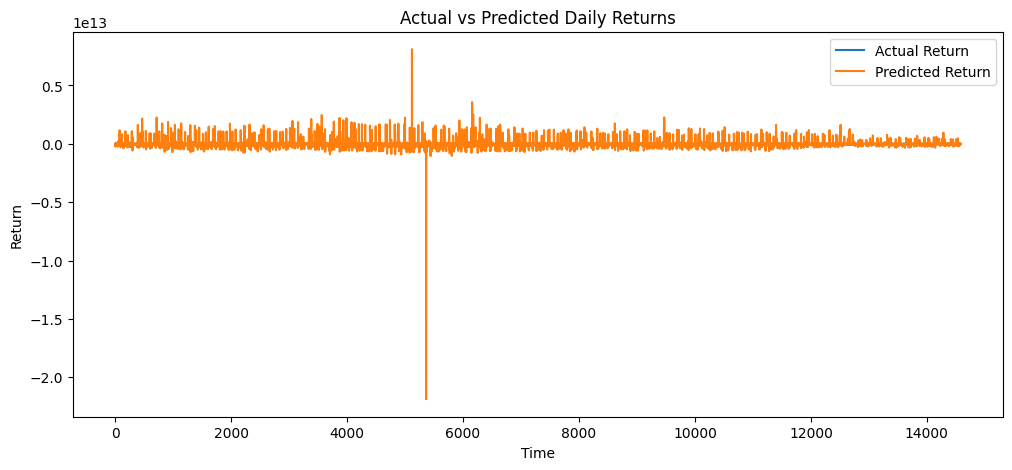

In [28]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,5))
plt.plot(results['actual_return'].values, label='Actual Return')
plt.plot(results['predicted_return'].values, label='Predicted Return')
plt.legend()
plt.title("Actual vs Predicted Daily Returns")
plt.xlabel("Time")
plt.ylabel("Return")
plt.show()
